In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import data_info, load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_w6a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

C:\Users\Utente\AppData\Local\Temp\ipykernel_5624\3261090548.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
C = 0.5
sgd_steps = (1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001)
sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01, 0.005)
# momentum_steps = (0.9, 0.99)
sls_steps = (1, 0.5, 0.1, 0.05, 0.01, 0.005)
armijo_damps = (0.3, 0.5, 0.7, 0.9)
momentum_damps = (0.3, 0.5, 0.7)

# w1a

In [3]:
# data_w1a = load_w1a()
data_info(load_w1a())

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}


In [4]:
Mw1a_grid = (32, 64)
for i in Mw1a_grid:
    print(f"Iterations: {load_w1a()[1].size / i}")

Iterations: 77.40625
Iterations: 38.703125


## Benchmark

In [5]:
benchw1a = run_bench(load_w1a(), C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [6]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), (load_w1a()[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.155718
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.013565
Epochs: 12


In [7]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, load_w1a(), Mw1a_grid, sgdd_steps, n_jobs=7)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, load_w1a(), Mw1a_grid, sgd_steps, n_jobs=7)

{'batch': 32, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.494559
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667311
Run-time (seconds): 0.168522
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.820768
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.9702360805550855
Objective function: 0.464614
Grad norm: 0.000792
Sol norm: 0.667400
Run-time (seconds): 0.091147
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.05, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.895541
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.9702360805550855
Objective function: 0.464615
Grad norm: 0.000965
Sol norm: 0.667388
Run-time (seconds): 0.886036
Epochs: 167


In [8]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=7)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, load_w1a(), Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=7)

{'batch': 64, 'alpha': 0.05, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 33.490891
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9713995599932307
Objective function: 0.536138
Grad norm: 0.362781
Sol norm: 0.455603
Run-time (seconds): 3.435221
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.7}
Grid search run-time (seconds): 121.549660
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009149
Sol norm: 0.665656
Run-time (seconds): 3.084805
Epochs: 600
% ------ %
{'batch': 64, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 40.957989
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9702360805550855
Objective function: 0.464693
Grad norm: 0.009144
Sol norm: 0.665659
Run-time (seconds): 3.118105
Epochs: 600


In [9]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.050,0.0,0.536138,0.362781,3.435221,600,0.973355,0.971400,0.541667,0.519545,0.455603
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
3,SGD-Fixed,0.5,2477.0,1.000,0.0,0.464614,0.000564,0.013565,12,0.970933,0.970236,0.500000,0.500000,0.667389
5,SGD-Decreasing,0.5,64.0,0.500,0.0,0.464614,0.000792,0.091147,27,0.970933,0.970236,0.500000,0.500000,0.667400
4,SGD-Fixed,0.5,32.0,0.010,0.0,0.464615,0.000852,0.168522,27,0.970933,0.970236,0.500000,0.500000,0.667311
6,SGDM,0.5,64.0,0.050,0.9,0.464615,0.000965,0.886036,167,0.970933,0.970236,0.500000,0.500000,0.667388
9,MSL-SGDM-R,0.5,64.0,0.005,0.9,0.464693,0.009144,3.118105,600,0.970933,0.970236,0.500000,0.500000,0.665659
8,MSL-SGDM-C,0.5,64.0,0.005,0.9,0.464693,0.009149,3.084805,600,0.970933,0.970236,0.500000,0.500000,0.665656


In [10]:
print(test_w1a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 3.435221 & 0.455603 & 0.536138 & 0.362781 & 0.971400 \\
Newton-CG & 6 & NaN & 0.667394 & 0.464614 & 0.000046 & 0.970236 \\
CG & 7 & NaN & 0.667395 & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & 7 & NaN & 0.667406 & 0.464614 & 0.000023 & 0.970236 \\
SGD-Fixed & 12 & 0.013565 & 0.667389 & 0.464614 & 0.000564 & 0.970236 \\
SGD-Decreasing & 27 & 0.091147 & 0.667400 & 0.464614 & 0.000792 & 0.970236 \\
SGD-Fixed & 27 & 0.168522 & 0.667311 & 0.464615 & 0.000852 & 0.970236 \\
SGDM & 167 & 0.886036 & 0.667388 & 0.464615 & 0.000965 & 0.970236 \\
MSL-SGDM-R & 600 & 3.118105 & 0.665659 & 0.464693 & 0.009144 & 0.970236 \\
MSL-SGDM-C & 600 & 3.084805 & 0.665656 & 0.464693 & 0.009149 & 0.970236 \\
\bottomrule
\end{tabular}



## SGD

In [6]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), (load_w1a()[1].size,))

Run-time (seconds): 1.535837


In [7]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, load_w1a(), Mw1a_grid)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, load_w1a(), Mw1a_grid)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, load_w1a(), Mw1a_grid)

Run-time (seconds): 3.657924
Run-time (seconds): 4.872923
Run-time (seconds): 8.542837


In [8]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, load_w1a(), Mw1a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, load_w1a(), Mw1a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, load_w1a(), Mw1a_grid, delta_a=armijo_damps)

Run-time (seconds): 37.082272
Run-time (seconds): 32.966963
Run-time (seconds): 26.730548


In [9]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [10]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,2.987466e-16,0.093061,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.464614,3.223885e-05,1.100416,200,0.970933,0.970236,0.500000,0.500000,0.667409
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.088155,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.464614,1.362337e-04,0.566260,200,0.970933,0.970236,0.500000,0.500000,0.667415
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.464614,3.613466e-04,0.570664,200,0.970933,0.970236,0.500000,0.500000,0.667479
13,SGDM,0.5,32.0,0.10,0.9,0.464616,1.427547e-03,2.689431,200,0.970933,0.970236,0.500000,0.500000,0.667781
12,SGDM,0.5,64.0,1.00,0.9,0.464669,7.649697e-03,1.396797,200,0.970933,0.970236,0.500000,0.500000,0.668467


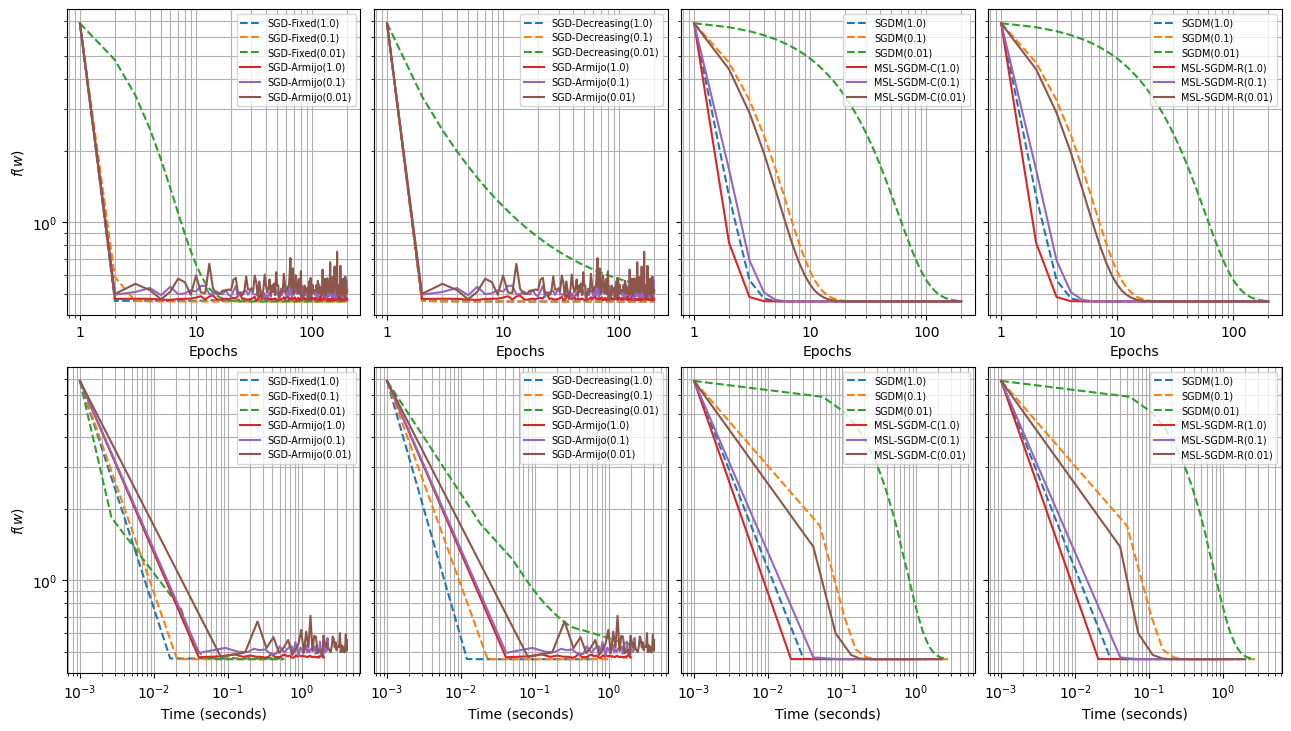

In [11]:
diagnostic([sgdfixed_w1a, sgddecre_w1a, sgdm_w1a, sgdarmijo_w1a, mslc_w1a, mslr_w1a])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [12]:
data_info(load_w3a())

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}


In [13]:
Mw3a_grid = (64, 128)
for i in Mw3a_grid:
    print(f"Iterations: {load_w3a()[1].size / i}")

Iterations: 76.75
Iterations: 38.375


## Benchmark

In [14]:
benchw3a = run_bench(load_w3a(), C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [20]:
batchfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), (load_w3a()[1].size,), sgd_steps)

{'batch': 4912, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.342218
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462742
Grad norm: 0.000564
Sol norm: 0.666635
Run-time (seconds): 0.010109
Epochs: 12


In [21]:
sgdfixed_w3a1, _ = grid_search("SGD-Fixed", C, load_w3a(), Mw3a_grid, sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search("SGD-Decreasing", C, load_w3a(), Mw3a_grid, sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search("SGDM", C, load_w3a(), Mw3a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.005, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 6.325428
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000850
Sol norm: 0.666572
Run-time (seconds): 0.391928
Epochs: 42
% ----- %
{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.422802
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000876
Sol norm: 0.666731
Run-time (seconds): 0.081816
Epochs: 19
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.754768
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.9702031804090372
Objective function: 0.462743
Grad norm: 0.000895
Sol norm: 0.666594
Run-time (seconds): 0.327101
Epochs: 45


In [22]:
sgdarmijo_w3a1, _ = grid_search("SGD-Armijo", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_w3a1, _ = grid_search("MSL-SGDM-C", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_w3a1, _ = grid_search("MSL-SGDM-R", C, load_w3a(), Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 44.374618
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9710060887213685
Objective function: 0.500431
Grad norm: 0.268456
Sol norm: 0.478986
Run-time (seconds): 9.134311
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0.5}
Grid search run-time (seconds): 125.319785
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 3.637216
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 42.436224
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9702031804090372
Objective function: 0.462787
Grad norm: 0.006924
Sol norm: 0.667576
Run-time (seconds): 3.466294
Epochs: 600


In [23]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.500431,0.268456,9.134311,600,0.971702,0.971006,0.513986,0.513473,0.478986
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
3,SGD-Fixed,0.5,4912.0,1.000,0.0,0.462742,0.000564,0.010109,12,0.970888,0.970203,0.500000,0.500000,0.666635
4,SGD-Fixed,0.5,64.0,0.005,0.0,0.462743,0.000850,0.391928,42,0.970888,0.970203,0.500000,0.500000,0.666572
5,SGD-Decreasing,0.5,128.0,0.500,0.0,0.462743,0.000876,0.081816,19,0.970888,0.970203,0.500000,0.500000,0.666731
6,SGDM,0.5,64.0,0.100,0.9,0.462743,0.000895,0.327101,45,0.970888,0.970203,0.500000,0.500000,0.666594
8,MSL-SGDM-C,0.5,128.0,0.005,0.9,0.462787,0.006924,3.637216,600,0.970888,0.970203,0.500000,0.500000,0.667576
9,MSL-SGDM-R,0.5,128.0,0.005,0.9,0.462787,0.006924,3.466294,600,0.970888,0.970203,0.500000,0.500000,0.667576


In [24]:
print(test_w3a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 9.134311 & 0.478986 & 0.500431 & 0.268456 & 0.971006 \\
Newton-CG & 6 & NaN & 0.666640 & 0.462742 & 0.000011 & 0.970203 \\
CG & 7 & NaN & 0.666648 & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & 7 & NaN & 0.666658 & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 12 & 0.010109 & 0.666635 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Fixed & 42 & 0.391928 & 0.666572 & 0.462743 & 0.000850 & 0.970203 \\
SGD-Decreasing & 19 & 0.081816 & 0.666731 & 0.462743 & 0.000876 & 0.970203 \\
SGDM & 45 & 0.327101 & 0.666594 & 0.462743 & 0.000895 & 0.970203 \\
MSL-SGDM-C & 600 & 3.637216 & 0.667576 & 0.462787 & 0.006924 & 0.970203 \\
MSL-SGDM-R & 600 & 3.466294 & 0.667576 & 0.462787 & 0.006924 & 0.970203 \\
\bottomrule
\end{tabular}



## SGD

In [15]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), (load_w3a()[1].size,))

Run-time (seconds): 1.244273


In [16]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, load_w3a(), Mw3a_grid)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, load_w3a(), Mw3a_grid)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, load_w3a(), Mw3a_grid)

Run-time (seconds): 8.826205
Run-time (seconds): 8.770133
Run-time (seconds): 8.720088


In [17]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, load_w3a(), Mw3a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, load_w3a(), Mw3a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, load_w3a(), Mw3a_grid, delta_a=armijo_damps)

Run-time (seconds): 38.158444
Run-time (seconds): 35.300378
Run-time (seconds): 28.861619


In [18]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [19]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.257618,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.462742,2.245811e-05,2.758615,200,0.970888,0.970203,0.500000,0.500000,0.666654
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.462742,8.337571e-05,1.503428,200,0.970888,0.970203,0.500000,0.500000,0.666662
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.254702,200,0.970888,0.970203,0.500000,0.500000,0.666639
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.462742,2.079663e-04,1.517110,200,0.970888,0.970203,0.500000,0.500000,0.666634
13,SGDM,0.5,128.0,0.10,0.9,0.462743,1.045321e-03,1.499266,200,0.970888,0.970203,0.500000,0.500000,0.666682
12,SGDM,0.5,128.0,1.00,0.9,0.462784,6.997876e-03,1.514067,200,0.970888,0.970203,0.500000,0.500000,0.663345


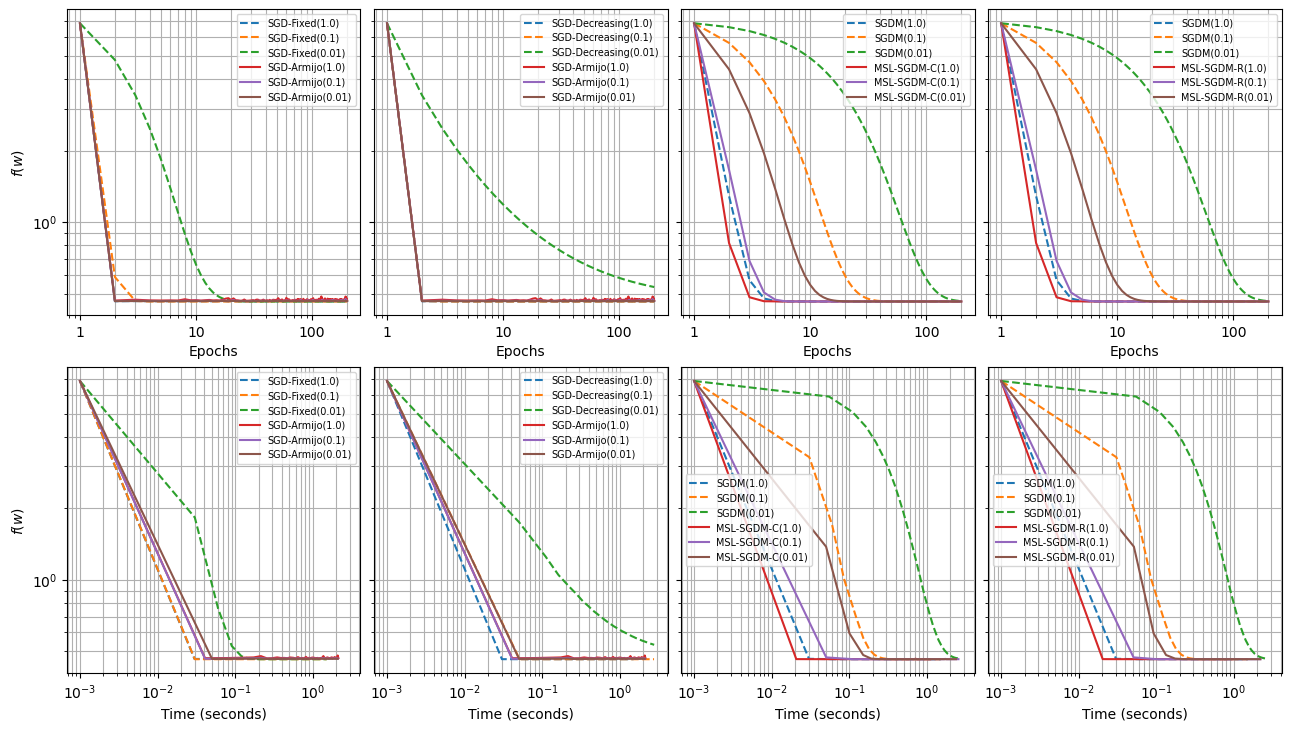

In [20]:
diagnostic([sgdfixed_w3a, sgddecre_w3a, sgdm_w3a, sgdarmijo_w3a, mslc_w3a, mslr_w3a])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [21]:
data_info(load_phishing())

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}


In [22]:
Mphish_grid = (64, 128)
for i in Mphish_grid:
    print(f"Iterations: {load_phishing()[1].size / i}")

Iterations: 138.1875
Iterations: 69.09375


## Benchmark

In [23]:
benchphish = run_bench(load_phishing(), C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [16]:
batchfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), (load_phishing()[1].size,), sgd_steps)

{'batch': 8844, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.709647
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.047205
Epochs: 11


In [17]:
sgdfixed_phish1, _ = grid_search("SGD-Fixed", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_phish1, _ = grid_search("SGD-Decreasing", C, load_phishing(), Mphish_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_phish1, _ = grid_search("SGDM", C, load_phishing(), Mphish_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 11.313842
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000927
Sol norm: 0.163727
Run-time (seconds): 0.168722
Epochs: 13
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 15.571788
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000508
Sol norm: 0.164270
Run-time (seconds): 0.090359
Epochs: 6
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 16.959142
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.5676164631388512
Objective function: 0.685065
Grad norm: 0.000575
Sol norm: 0.163872
Run-time (seconds): 0.653315
Epochs: 22


In [18]:
sgdarmijo_phish1, _ = grid_search("SGD-Armijo", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_phish1, _ = grid_search("MSL-SGDM-C", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_phish1, _ = grid_search("MSL-SGDM-R", C, load_phishing(), Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 128, 'alpha': 0.005, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 122.599176
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.8652193577566711
Objective function: 0.687736
Grad norm: 0.066541
Sol norm: 0.144155
Run-time (seconds): 14.571106
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 409.185154
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.7091813658977838
Objective function: 0.686392
Grad norm: 0.048846
Sol norm: 0.150617
Run-time (seconds): 18.953165
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 135.145798
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.5685210312075983
Objective function: 0.685660
Grad norm: 0.032621
Sol norm: 0.152190
Run-time (seconds): 28.793977
Epochs: 600


In [19]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,128.0,0.005,0.0,0.687736,6.654144e-02,14.571106,600,0.860357,0.865219,0.847576,0.848254,0.144155
8,MSL-SGDM-C,0.5,128.0,0.005,0.9,0.686392,4.884556e-02,18.953165,600,0.712913,0.709181,0.678080,0.663703,0.150617
9,MSL-SGDM-R,0.5,64.0,0.100,0.9,0.685660,3.262091e-02,28.793977,600,0.555631,0.568521,0.501522,0.501046,0.152190
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
5,SGD-Decreasing,0.5,128.0,0.100,0.0,0.685065,5.077752e-04,0.090359,6,0.554274,0.567616,0.500000,0.500000,0.164270
6,SGDM,0.5,64.0,0.100,0.9,0.685065,5.749916e-04,0.653315,22,0.554274,0.567616,0.500000,0.500000,0.163872
3,SGD-Fixed,0.5,8844.0,1.000,0.0,0.685065,5.343408e-04,0.047205,11,0.554274,0.567616,0.500000,0.500000,0.164001
4,SGD-Fixed,0.5,64.0,0.010,0.0,0.685065,9.272841e-04,0.168722,13,0.554274,0.567616,0.500000,0.500000,0.163727


In [20]:
print(test_phish[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 14.571106 & 0.144155 & 0.687736 & 0.066541 & 0.865219 \\
MSL-SGDM-C & 600 & 18.953165 & 0.150617 & 0.686392 & 0.048846 & 0.709181 \\
MSL-SGDM-R & 600 & 28.793977 & 0.152190 & 0.685660 & 0.032621 & 0.568521 \\
Newton-CG & 5 & NaN & 0.164188 & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & 5 & NaN & 0.164196 & 0.685065 & 0.000008 & 0.567616 \\
CG & 6 & NaN & 0.164214 & 0.685065 & 0.000023 & 0.567616 \\
SGD-Decreasing & 6 & 0.090359 & 0.164270 & 0.685065 & 0.000508 & 0.567616 \\
SGDM & 22 & 0.653315 & 0.163872 & 0.685065 & 0.000575 & 0.567616 \\
SGD-Fixed & 11 & 0.047205 & 0.164001 & 0.685065 & 0.000534 & 0.567616 \\
SGD-Fixed & 13 & 0.168722 & 0.163727 & 0.685065 & 0.000927 & 0.567616 \\
\bottomrule
\end{tabular}



## SGD

In [24]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), (load_phishing()[1].size,))

Run-time (seconds): 1.931275


In [25]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, load_phishing(), Mphish_grid)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, load_phishing(), Mphish_grid)
# SGDM
sgdm_phish = run_solvers("SGDM", C, load_phishing(), Mphish_grid)

Run-time (seconds): 15.245216
Run-time (seconds): 15.167298
Run-time (seconds): 15.260462


In [26]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, load_phishing(), Mphish_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, load_phishing(), Mphish_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, load_phishing(), Mphish_grid, delta_a=armijo_damps)

Run-time (seconds): 67.363044
Run-time (seconds): 81.823578
Run-time (seconds): 64.734484


In [27]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [28]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.499670,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,2.777003,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.505361,200,0.554274,0.567616,0.500000,0.500000,0.164175
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,1.780320e-04,2.687420,200,0.554274,0.567616,0.500000,0.500000,0.164100
16,SGDM,0.5,128.0,0.10,0.9,0.685065,3.250223e-04,2.737698,200,0.554274,0.567616,0.500000,0.500000,0.164351
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.685065,5.224586e-04,2.764325,200,0.554274,0.567616,0.500000,0.500000,0.163919
17,SGDM,0.5,64.0,0.01,0.9,0.685065,7.669520e-04,4.928672,200,0.554274,0.567616,0.500000,0.500000,0.163967


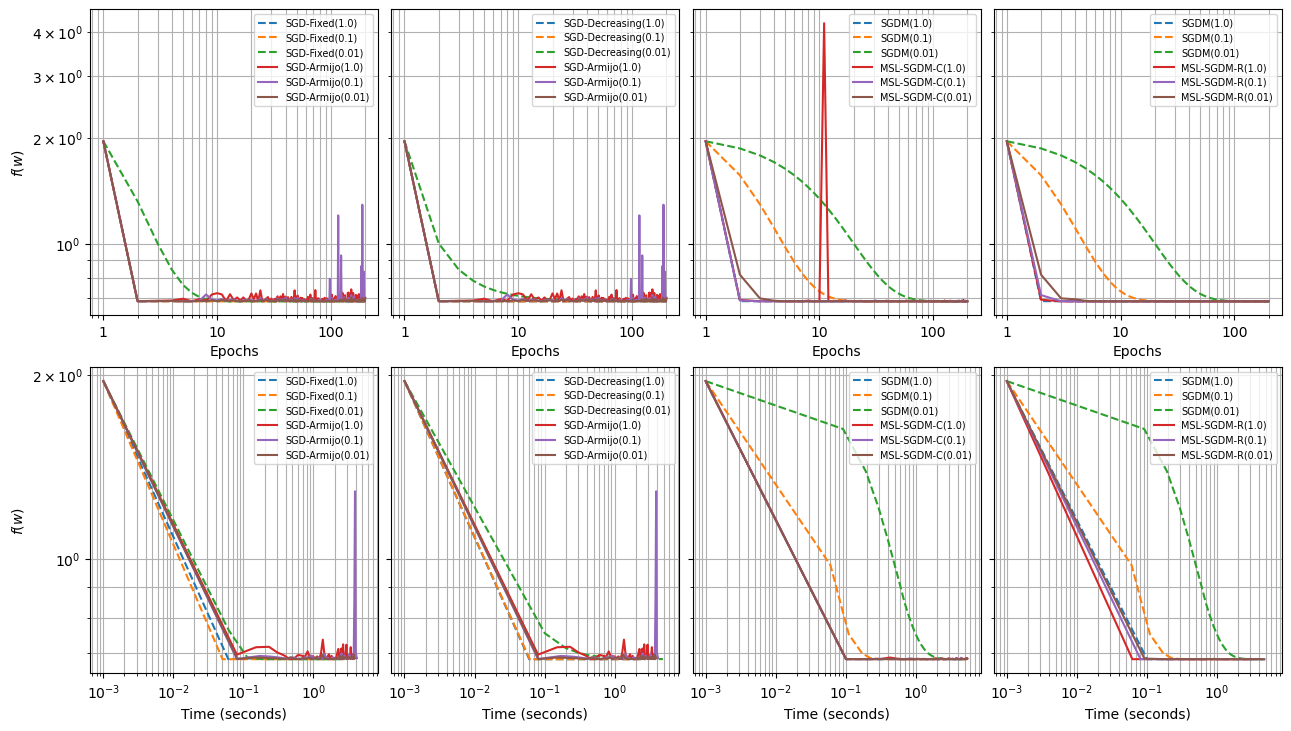

In [29]:
diagnostic([sgdfixed_phish, sgddecre_phish, sgdm_phish, sgdarmijo_phish, mslc_phish, mslr_phish])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [30]:
data_info(load_a2a())

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Class distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}


In [31]:
Ma2a_grid = (32, 64)
for i in Ma2a_grid:
    print(f"Iterations: {load_a2a()[1].size / i}")

Iterations: 70.78125
Iterations: 35.390625


## Benchmark

In [32]:
bencha2a = run_bench(load_a2a(), C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [30]:
batchfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), (load_a2a()[1].size,), sgd_steps)

{'batch': 2265, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.107193
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.8223857935040929
Objective function: 0.594416
Grad norm: 0.363976
Sol norm: 0.355752
Run-time (seconds): 0.223871
Epochs: 600


In [31]:
sgdfixed_a2a1, _ = grid_search("SGD-Fixed", C, load_a2a(), Ma2a_grid, sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search("SGD-Decreasing", C, load_a2a(), Ma2a_grid, sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search("SGDM", C, load_a2a(), Ma2a_grid, sgd_steps)

{'batch': 32, 'alpha': 1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.971814
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.8071362556113019
Objective function: 0.602741
Grad norm: 0.356183
Sol norm: 0.425177
Run-time (seconds): 3.470429
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 0.8, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 4.900255
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.7602653815685239
Objective function: 0.564028
Grad norm: 0.000726
Sol norm: 0.438522
Run-time (seconds): 0.325202
Epochs: 59
% ------- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 12.432032
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.7602983892263006
Objective function: 0.564030
Grad norm: 0.002628
Sol norm: 0.438444
Run-time (seconds): 4.151845
Epochs: 600


In [32]:
sgdarmijo_a2a1, _ = grid_search("SGD-Armijo", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)
print("% ------- %")
mslc_a2a1, _ = grid_search("MSL-SGDM-C", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ------- %")
mslr_a2a1, _ = grid_search("MSL-SGDM-R", C, load_a2a(), Ma2a_grid, sls_steps, delta_a=armijo_damps)

{'batch': 64, 'alpha': 0.5, 'beta': 0, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 77.999057
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.8251914444151043
Objective function: 0.603503
Grad norm: 0.397378
Sol norm: 0.344862
Run-time (seconds): 9.145561
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.005, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 222.491238
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.8105690520200687
Objective function: 0.585491
Grad norm: 0.290117
Sol norm: 0.406144
Run-time (seconds): 13.950318
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0}
Grid search run-time (seconds): 74.066603
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.7902363348296805
Objective function: 0.577575
Grad norm: 0.228297
Sol norm: 0.413366
Run-time (seconds): 13.066587
Epochs: 600


In [33]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.500,0.0,0.603503,0.397378,9.145561,600,0.803091,0.825191,0.654707,0.680243,0.344862
3,SGD-Fixed,0.5,2265.0,1.000,0.0,0.594416,0.363976,0.223871,600,0.805740,0.822386,0.661688,0.678397,0.355752
8,MSL-SGDM-C,0.5,32.0,0.005,0.9,0.585491,0.290117,13.950318,600,0.794702,0.810569,0.617841,0.631790,0.406144
4,SGD-Fixed,0.5,32.0,1.000,0.0,0.602741,0.356183,3.470429,600,0.788079,0.807136,0.640035,0.659046,0.425177
9,MSL-SGDM-R,0.5,32.0,0.010,0.9,0.577575,0.228297,13.066587,600,0.780574,0.790236,0.573084,0.572237,0.413366
6,SGDM,0.5,64.0,0.100,0.9,0.564030,0.002628,4.151845,600,0.748344,0.760298,0.501748,0.500481,0.438444
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
5,SGD-Decreasing,0.5,64.0,0.800,0.0,0.564028,0.000726,0.325202,59,0.748344,0.760265,0.501748,0.500413,0.438522


In [34]:
print(test_a2a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 9.145561 & 0.344862 & 0.603503 & 0.397378 & 0.825191 \\
SGD-Fixed & 600 & 0.223871 & 0.355752 & 0.594416 & 0.363976 & 0.822386 \\
MSL-SGDM-C & 600 & 13.950318 & 0.406144 & 0.585491 & 0.290117 & 0.810569 \\
SGD-Fixed & 600 & 3.470429 & 0.425177 & 0.602741 & 0.356183 & 0.807136 \\
MSL-SGDM-R & 600 & 13.066587 & 0.413366 & 0.577575 & 0.228297 & 0.790236 \\
SGDM & 600 & 4.151845 & 0.438444 & 0.564030 & 0.002628 & 0.760298 \\
Newton-CG & 5 & NaN & 0.438972 & 0.564027 & 0.000004 & 0.760265 \\
CG & 12 & NaN & 0.438961 & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & 8 & NaN & 0.438969 & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 59 & 0.325202 & 0.438522 & 0.564028 & 0.000726 & 0.760265 \\
\bottomrule
\end{tabular}



## SGD

In [33]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), (load_a2a()[1].size,))

Run-time (seconds): 0.844736


In [34]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, load_a2a(), Ma2a_grid)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, load_a2a(), Ma2a_grid)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, load_a2a(), Ma2a_grid)

Run-time (seconds): 7.656296
Run-time (seconds): 7.590281
Run-time (seconds): 7.552729


In [35]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, load_a2a(), Ma2a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, load_a2a(), Ma2a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, load_a2a(), Ma2a_grid, delta_a=armijo_damps)

Run-time (seconds): 39.374910
Run-time (seconds): 33.702170
Run-time (seconds): 26.771931


In [36]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [37]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
4,SGD-Fixed,0.5,2265.0,0.10,0.0,0.564027,0.000046,0.133085,200,0.748344,0.760265,0.501748,0.500413,0.438971
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.564027,0.000058,2.375145,200,0.748344,0.760265,0.501748,0.500413,0.438960
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.564027,0.000794,1.264373,200,0.748344,0.760265,0.501748,0.500413,0.439149
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.564029,0.002547,1.256718,200,0.748344,0.760265,0.501748,0.500413,0.439606
13,SGDM,0.5,64.0,0.10,0.9,0.564032,0.002789,1.238034,200,0.748344,0.760265,0.501748,0.500413,0.438941
12,SGDM,0.5,32.0,1.00,0.9,0.564445,0.026860,2.391817,200,0.748344,0.760529,0.501748,0.501057,0.439078
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,2.390484,200,0.748344,0.760331,0.501748,0.500597,0.436755


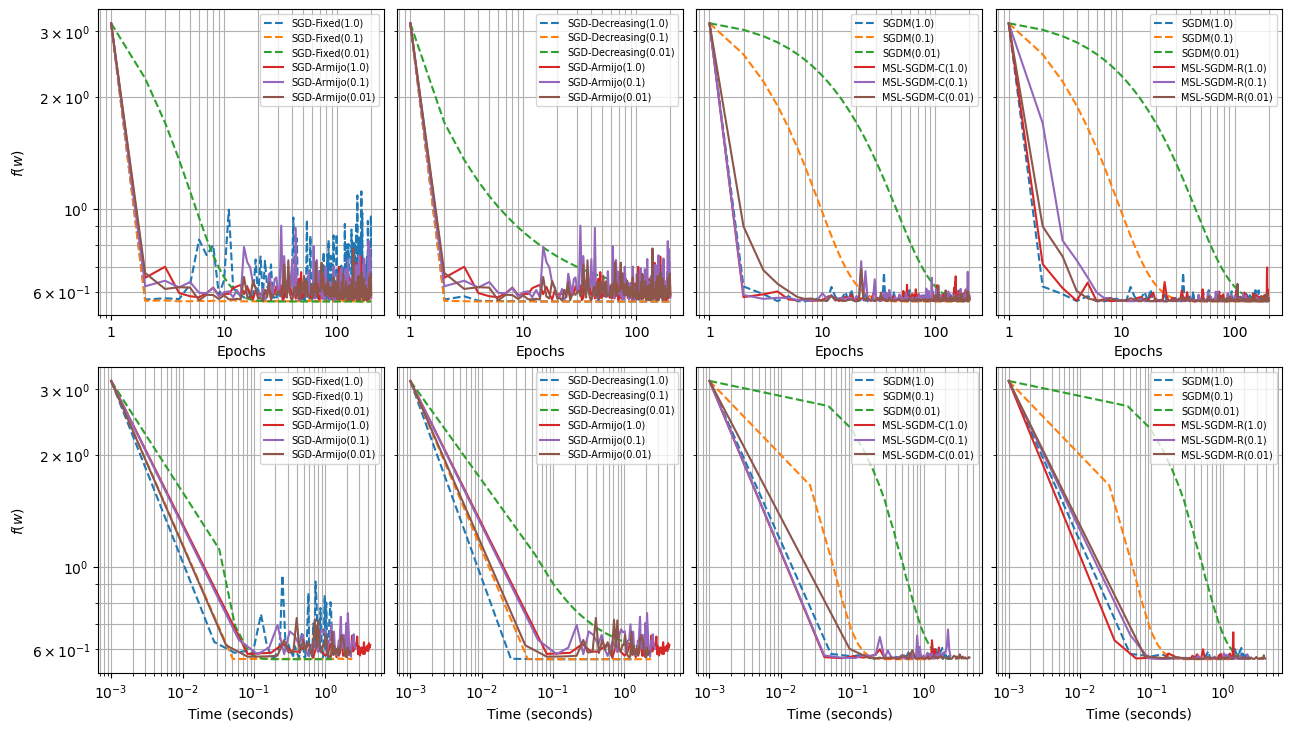

In [38]:
diagnostic([sgdfixed_a2a, sgddecre_a2a, sgdm_a2a, sgdarmijo_a2a, mslc_a2a, mslr_a2a]),
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [39]:
data_info(load_mushrooms())

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [40]:
Mmush_grid = (64, 128)
for i in Mmush_grid:
    print(f"Iterations: {load_mushrooms()[1].size / i}")

Iterations: 101.546875
Iterations: 50.7734375


## Benchmark

In [41]:
benchMush = run_bench(load_mushrooms(), C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [44]:
batchfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), (load_mushrooms()[1].size,), sgd_steps)

{'batch': 6499, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 1.726418
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.8929230769230769
Objective function: 0.517727
Grad norm: 0.000757
Sol norm: 0.635906
Run-time (seconds): 0.040477
Epochs: 26


In [45]:
sgdfixed_mush1, _ = grid_search("SGD-Fixed", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_mush1, _ = grid_search("SGD-Decreasing", C, load_mushrooms(), Mmush_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_mush1, _ = grid_search("SGDM", C, load_mushrooms(), Mmush_grid, sgd_steps, n_jobs=8)

{'batch': 128, 'alpha': 0.5, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 5.991431
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.9261538461538461
Objective function: 0.525499
Grad norm: 0.199874
Sol norm: 0.646431
Run-time (seconds): 3.646531
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 11.464599
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.8935384615384615
Objective function: 0.517727
Grad norm: 0.000779
Sol norm: 0.635898
Run-time (seconds): 0.227495
Epochs: 26
% ----- %
{'batch': 128, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 15.032742
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.9243076923076923
Objective function: 0.557069
Grad norm: 0.479065
Sol norm: 0.658660
Run-time (seconds): 6.972188
Epochs: 600


In [46]:
sgdarmijo_mush1, _ = grid_search("SGD-Armijo", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)
print("% ----- %")
mslc_mush1, _ = grid_search("MSL-SGDM-C", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=8)
print("% ----- %")
mslr_mush1, _ = grid_search("MSL-SGDM-R", C, load_mushrooms(), Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=8)

{'batch': 64, 'alpha': 0.1, 'beta': 0, 'delta_a': 0.5, 'delta_m': 0}
Grid search run-time (seconds): 106.104075
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.9532307692307692
Objective function: 0.535765
Grad norm: 0.233549
Sol norm: 0.644938
Run-time (seconds): 21.815584
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.05, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 307.458514
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.9427692307692308
Objective function: 0.529380
Grad norm: 0.249789
Sol norm: 0.652698
Run-time (seconds): 11.928245
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 0.1, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0}
Grid search run-time (seconds): 102.809091
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.9403076923076923
Objective function: 0.527069
Grad norm: 0.232121
Sol norm: 0.642551
Run-time (seconds): 11.775004
Epochs: 600


In [47]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
7,SGD-Armijo,0.5,64.0,0.10,0.0,0.535765,0.233549,21.815584,600,0.957378,0.953231,0.957417,0.953396,0.644938
8,MSL-SGDM-C,0.5,128.0,0.05,0.9,0.529380,0.249789,11.928245,600,0.953224,0.942769,0.952891,0.942573,0.652698
9,MSL-SGDM-R,0.5,128.0,0.10,0.9,0.527069,0.232121,11.775004,600,0.947684,0.940308,0.946972,0.939506,0.642551
4,SGD-Fixed,0.5,128.0,0.50,0.0,0.525499,0.199874,3.646531,600,0.933220,0.926154,0.931701,0.924477,0.646431
6,SGDM,0.5,128.0,1.00,0.9,0.557069,0.479065,6.972188,600,0.935990,0.924308,0.937475,0.926352,0.658660
5,SGD-Decreasing,0.5,64.0,0.10,0.0,0.517727,0.000779,0.227495,26,0.895676,0.893538,0.892565,0.890219,0.635898
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
3,SGD-Fixed,0.5,6499.0,0.50,0.0,0.517727,0.000757,0.040477,26,0.895369,0.892923,0.892246,0.889580,0.635906


In [48]:
print(test_mush[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Armijo & 600 & 21.815584 & 0.644938 & 0.535765 & 0.233549 & 0.953231 \\
MSL-SGDM-C & 600 & 11.928245 & 0.652698 & 0.529380 & 0.249789 & 0.942769 \\
MSL-SGDM-R & 600 & 11.775004 & 0.642551 & 0.527069 & 0.232121 & 0.940308 \\
SGD-Fixed & 600 & 3.646531 & 0.646431 & 0.525499 & 0.199874 & 0.926154 \\
SGDM & 600 & 6.972188 & 0.658660 & 0.557069 & 0.479065 & 0.924308 \\
SGD-Decreasing & 26 & 0.227495 & 0.635898 & 0.517727 & 0.000779 & 0.893538 \\
Newton-CG & 7 & NaN & 0.635933 & 0.517726 & 0.000003 & 0.892923 \\
CG & 11 & NaN & 0.635939 & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & 10 & NaN & 0.635930 & 0.517726 & 0.000017 & 0.892923 \\
SGD-Fixed & 26 & 0.040477 & 0.635906 & 0.517727 & 0.000757 & 0.892923 \\
\bottomrule
\end{tabular}



## SGD

In [42]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), (load_mushrooms()[1].size,))

Run-time (seconds): 1.331104


In [43]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, load_mushrooms(), Mmush_grid)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, load_mushrooms(), Mmush_grid)
# SGDM
sgdm_mush = run_solvers("SGDM", C, load_mushrooms(), Mmush_grid)

Run-time (seconds): 11.174647
Run-time (seconds): 11.211535
Run-time (seconds): 11.144450


In [44]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, load_mushrooms(), Mmush_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, load_mushrooms(), Mmush_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, load_mushrooms(), Mmush_grid, delta_a=armijo_damps)

Run-time (seconds): 59.406621
Run-time (seconds): 57.299836
Run-time (seconds): 46.426938


In [45]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [46]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.517726,0.000011,1.967018,200,0.895522,0.892923,0.892406,0.889580,0.635940
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,6499.0,0.10,0.0,0.517726,0.000046,0.314882,200,0.895522,0.892923,0.892406,0.889580,0.635932
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.517726,0.000244,1.967477,200,0.895522,0.892923,0.892406,0.889580,0.636065
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.002024,1.963608,200,0.895215,0.892923,0.892087,0.889580,0.636349
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,1.946576,200,0.896138,0.894769,0.893077,0.891498,0.635850
14,SGDM,0.5,64.0,0.01,0.9,0.517770,0.006671,3.583804,200,0.895061,0.892923,0.891927,0.889580,0.635694
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,1.956964,200,0.898292,0.897231,0.895332,0.894055,0.637874


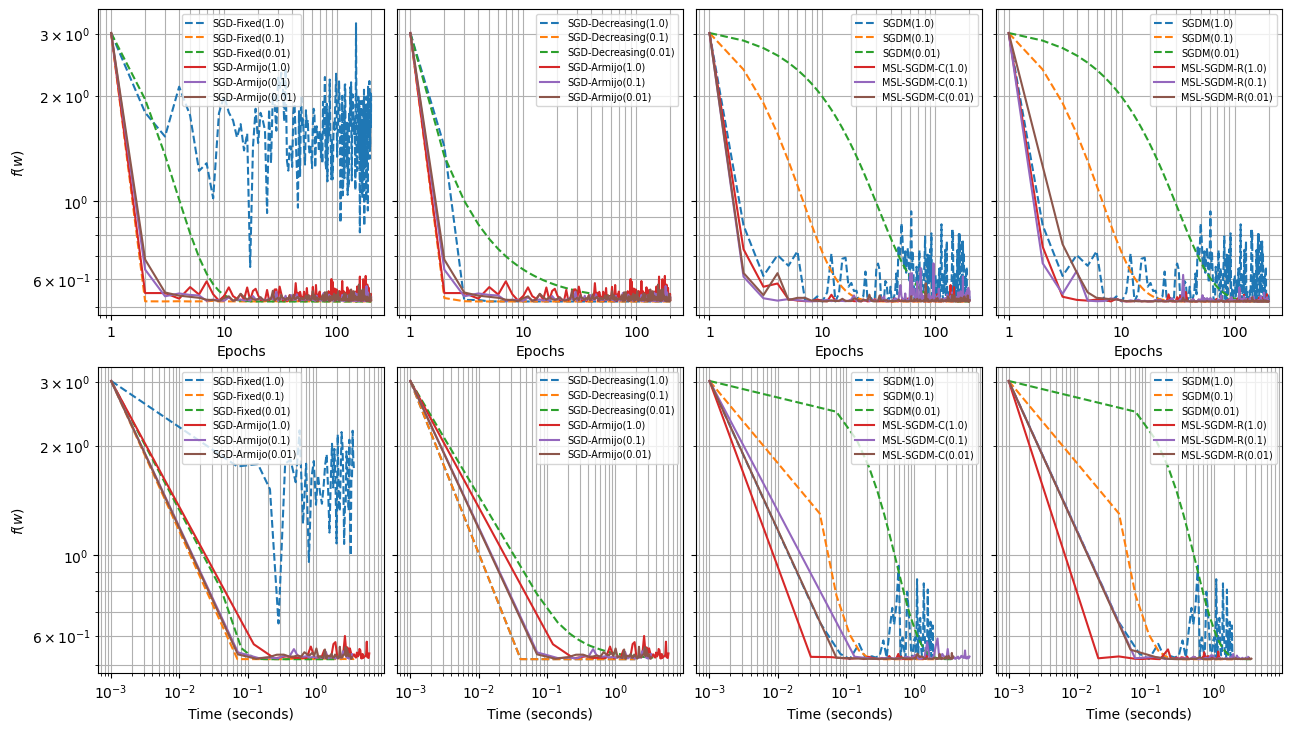

In [47]:
diagnostic([sgdfixed_mush, sgddecre_mush, sgdm_mush, sgdarmijo_mush, mslc_mush, mslr_mush]),
plt.savefig("./plots/mush-diagnostic.pdf")

# German

In [48]:
data_info(load_german())

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [49]:
Mgerman_grid = (16, 32)
for i in Mgerman_grid:
    print(f"Iterations: {load_german()[1].size / i}")

Iterations: 50.0
Iterations: 25.0


## Benchmark

In [50]:
benchgerman = run_bench(load_german(), C)

benchgerman_data = optim_bench(benchgerman)

## Fine-tuning

In [58]:
batchfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), (load_german()[1].size,), sgd_steps)

{'batch': 800, 'alpha': 0.005, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 0.906172
Number of combinations analyzed: 7
-----
Solver: SGD-Fixed
Test score: 0.72
Objective function: 0.616517
Grad norm: 0.152605
Sol norm: 0.365312
Run-time (seconds): 0.153498
Epochs: 600


In [59]:
sgdfixed_german1, _ = grid_search("SGD-Fixed", C, load_german(), Mgerman_grid, sgd_steps)
print("% ----- %")
sgddecre_german1, _ = grid_search("SGD-Decreasing", C, load_german(), Mgerman_grid, sgdd_steps)
print("% ----- %")
sgdm_german1, _ = grid_search("SGDM", C, load_german(), Mgerman_grid, sgd_steps)

{'batch': 16, 'alpha': 0.005, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 3.564203
Number of combinations analyzed: 14
-----
Solver: SGD-Fixed
Test score: 0.71
Objective function: 0.597303
Grad norm: 0.000675
Sol norm: 0.358265
Run-time (seconds): 0.257061
Epochs: 58
% ----- %
{'batch': 16, 'alpha': 0.01, 'beta': 0, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 2.395490
Number of combinations analyzed: 14
-----
Solver: SGD-Decreasing
Test score: 0.72
Objective function: 0.607993
Grad norm: 0.113583
Sol norm: 0.348660
Run-time (seconds): 2.215385
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 1, 'beta': 0.9, 'delta_a': 0, 'delta_m': 0}
Grid search run-time (seconds): 7.941164
Number of combinations analyzed: 14
-----
Solver: SGDM
Test score: 0.745
Objective function: 0.616375
Grad norm: 0.313714
Sol norm: 0.313661
Run-time (seconds): 3.940129
Epochs: 600


In [60]:
sgdarmijo_german1, _ = grid_search("SGD-Armijo", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)
print("% ----- %")
mslc_german1, _ = grid_search("MSL-SGDM-C", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps)
print("% ----- %")
mslr_german1, _ = grid_search("MSL-SGDM-R", C, load_german(), Mgerman_grid, sls_steps, delta_a=armijo_damps)

{'batch': 16, 'alpha': 0.5, 'beta': 0, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 56.099821
Number of combinations analyzed: 48
-----
Solver: SGD-Armijo
Test score: 0.75
Objective function: 0.632348
Grad norm: 0.362572
Sol norm: 0.423356
Run-time (seconds): 10.922734
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 0.5, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.3}
Grid search run-time (seconds): 160.672783
Number of combinations analyzed: 144
-----
Solver: MSL-SGDM-C
Test score: 0.755
Objective function: 0.629212
Grad norm: 0.364526
Sol norm: 0.365021
Run-time (seconds): 9.514724
Epochs: 600
% ----- %
{'batch': 16, 'alpha': 0.05, 'beta': 0.9, 'delta_a': 0.9, 'delta_m': 0}
Grid search run-time (seconds): 53.966940
Number of combinations analyzed: 48
-----
Solver: MSL-SGDM-R
Test score: 0.73
Objective function: 0.599779
Grad norm: 0.073177
Sol norm: 0.373225
Run-time (seconds): 10.601474
Epochs: 600


In [61]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
8,MSL-SGDM-C,0.5,16.0,0.500,0.9,0.629212,0.364526,9.514724,600,0.74625,0.755,0.655553,0.663601,0.365021
7,SGD-Armijo,0.5,16.0,0.500,0.0,0.632348,0.362572,10.922734,600,0.73875,0.750,0.664349,0.699483,0.423356
6,SGDM,0.5,16.0,1.000,0.9,0.616375,0.313714,3.940129,600,0.75375,0.745,0.632595,0.631867,0.313661
9,MSL-SGDM-R,0.5,16.0,0.050,0.9,0.599779,0.073177,10.601474,600,0.71625,0.730,0.546749,0.562087,0.373225
5,SGD-Decreasing,0.5,16.0,0.010,0.0,0.607993,0.113583,2.215385,600,0.70500,0.720,0.511554,0.530352,0.348660
3,SGD-Fixed,0.5,800.0,0.005,0.0,0.616517,0.152605,0.153498,600,0.70375,0.720,0.510659,0.530352,0.365312
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,16.0,0.005,0.0,0.597303,0.000675,0.257061,58,0.70375,0.710,0.511839,0.513403,0.358265


In [62]:
print(test_german[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
MSL-SGDM-C & 600 & 9.514724 & 0.365021 & 0.629212 & 0.364526 & 0.755000 \\
SGD-Armijo & 600 & 10.922734 & 0.423356 & 0.632348 & 0.362572 & 0.750000 \\
SGDM & 600 & 3.940129 & 0.313661 & 0.616375 & 0.313714 & 0.745000 \\
MSL-SGDM-R & 600 & 10.601474 & 0.373225 & 0.599779 & 0.073177 & 0.730000 \\
SGD-Decreasing & 600 & 2.215385 & 0.348660 & 0.607993 & 0.113583 & 0.720000 \\
SGD-Fixed & 600 & 0.153498 & 0.365312 & 0.616517 & 0.152605 & 0.720000 \\
Newton-CG & 5 & NaN & 0.358504 & 0.597303 & 0.000010 & 0.710000 \\
CG & 12 & NaN & 0.358506 & 0.597303 & 0.000004 & 0.710000 \\
L-BFGS-B & 7 & NaN & 0.358506 & 0.597303 & 0.000014 & 0.710000 \\
SGD-Fixed & 58 & 0.257061 & 0.358265 & 0.597303 & 0.000675 & 0.710000 \\
\bottomrule
\end{tabular}



## SGD

In [51]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, load_german(), (load_german()[1].size,))

Run-time (seconds): 0.344130


In [52]:
# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, load_german(), Mgerman_grid)
# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, load_german(), Mgerman_grid)
# SGDM
sgdm_german = run_solvers("SGDM", C, load_german(), Mgerman_grid)

Run-time (seconds): 5.126741
Run-time (seconds): 5.112596
Run-time (seconds): 5.055804


In [53]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, load_german(), Mgerman_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, load_german(), Mgerman_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, load_german(), Mgerman_grid, delta=armijo_damps)

Run-time (seconds): 28.683825
Run-time (seconds): 21.548099
Run-time (seconds): 3.931545


In [54]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [55]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,800.0,0.10,0.0,0.597303,0.000007,0.102108,200,0.70375,0.710,0.511839,0.513403,0.358503
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
10,SGD-Decreasing,0.5,16.0,0.10,0.0,0.597303,0.000081,1.690758,200,0.70375,0.710,0.511839,0.513403,0.358516
9,SGD-Decreasing,0.5,32.0,1.00,0.0,0.597303,0.000331,0.879716,200,0.70375,0.710,0.511839,0.513403,0.358365
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.597304,0.002731,0.872024,200,0.70375,0.710,0.511839,0.513403,0.357556
13,SGDM,0.5,16.0,0.10,0.9,0.597312,0.003659,1.660135,200,0.70375,0.710,0.511839,0.513403,0.356870
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.597712,0.027606,0.887250,200,0.70375,0.710,0.511839,0.513403,0.341221
23,MSL-SGDM-R,0.5,16.0,0.01,0.9,0.601819,0.082841,1.069030,200,0.69875,0.715,0.502360,0.521878,0.346593


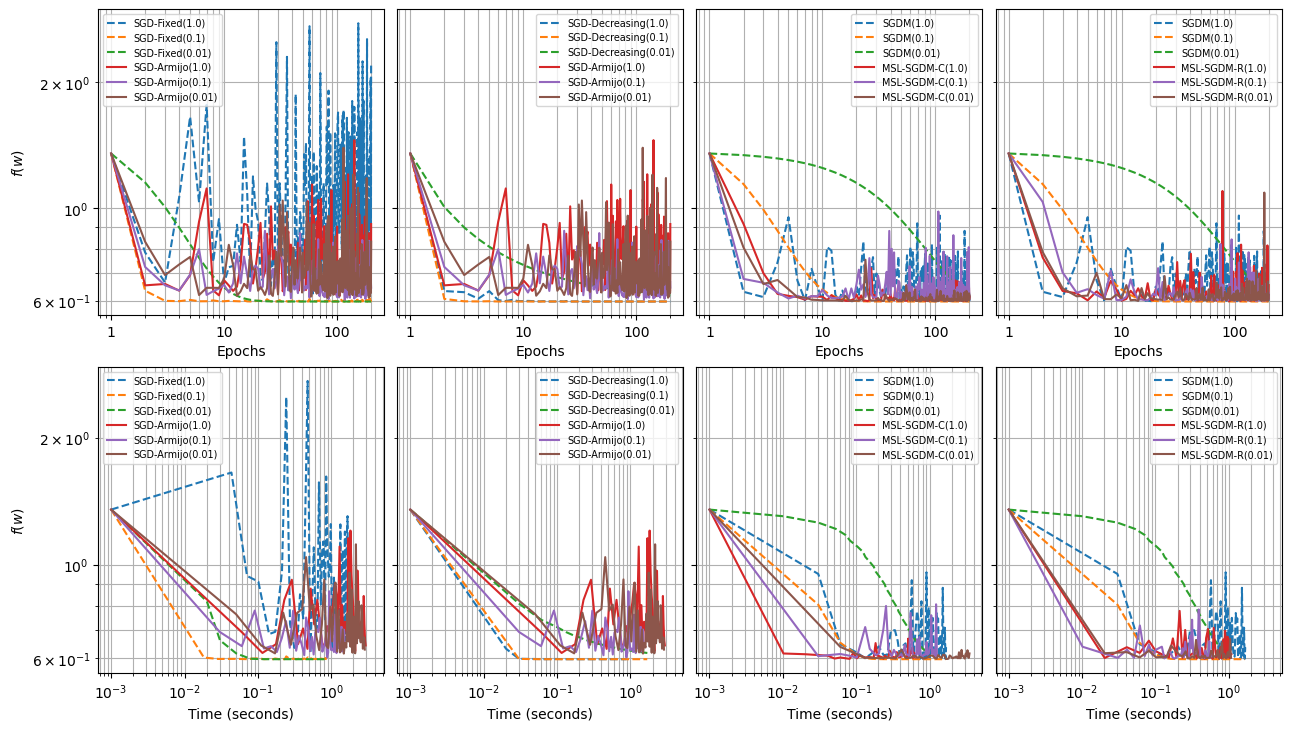

In [56]:
diagnostic([sgdfixed_german, sgddecre_german, sgdm_german, sgdarmijo_german, mslc_german, mslr_german]),
plt.savefig("./plots/german-diagnostic.pdf")